 ***APPAREL IMAGE CLASSIFICATION USING CNN***

Group members:

>AARUSHI RAY (2129002@kiit.ac.in / 8655738790)

> ADITI CHOUDHURY (2129007@kiit.ac.in / 8280069615)








In this notebook, we will classify small images Fashion mnist dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

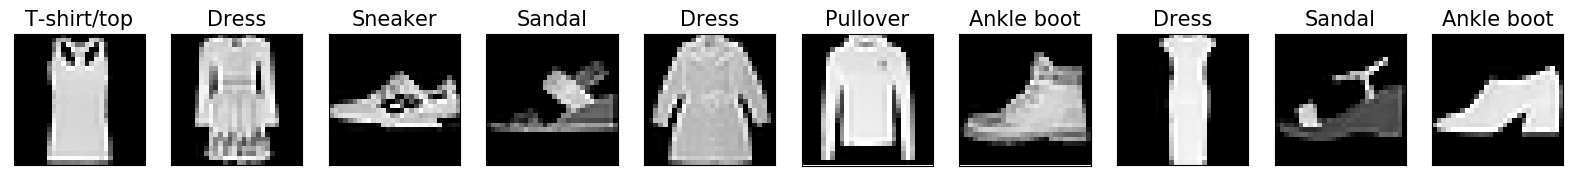

DATA PREPROCESSING

Importing necessary libraries

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,callbacks
import matplotlib.pyplot as plt
import numpy as np

Loading dataset Fashion MNIST

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.fashion_mnist.load_data()
X_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

Here we see there are 60000 training images and 10000 test images

In [5]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [6]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

creating a function to plot images along with their labels

In [7]:
def plot_sample(X,y,index):
  plt.figure(figsize=(1,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

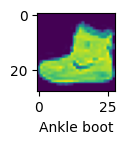

In [8]:
plot_sample(X_train,y_train,0)

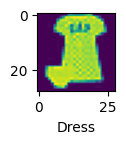

In [9]:
plot_sample(X_train,y_train,70)

Normalising pixel values

In [10]:
X_train = X_train / 255
X_test = X_test / 255

MODEL BUILDING

Defining a custom CNN architecture

In [18]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Displaying the model architechture

In [27]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

TESTING AND VALIDATION

In [24]:
early_stopping = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights=True
)

In [25]:
model_checkpoint = callbacks.ModelCheckpoint(
    'fashion_mnist_best_model.h5',
    save_best_only = True
)

Hyperparameters

In [26]:
NUM_EPOCHS = 30
BATCH_SIZE = 64

In [28]:
history = cnn.fit(
    X_train, y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
750/750 [==============================] - 21s 27ms/step - loss: 0.6124 - accuracy: 0.7766 - val_loss: 0.3999 - val_accuracy: 0.8542
Epoch 2/30
  3/750 [..............................] - ETA: 26s - loss: 0.5078 - accuracy: 0.8281

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 19s 25ms/step - loss: 0.3966 - accuracy: 0.8576 - val_loss: 0.3436 - val_accuracy: 0.8714
Epoch 3/30
750/750 [==============================] - 19s 25ms/step - loss: 0.3451 - accuracy: 0.8767 - val_loss: 0.3366 - val_accuracy: 0.8763
Epoch 4/30
750/750 [==============================] - 18s 24ms/step - loss: 0.3115 - accuracy: 0.8863 - val_loss: 0.3021 - val_accuracy: 0.8880
Epoch 5/30
750/750 [==============================] - 19s 25ms/step - loss: 0.2870 - accuracy: 0.8943 - val_loss: 0.2793 - val_accuracy: 0.8970
Epoch 6/30
750/750 [==============================] - 18s 24ms/step - loss: 0.2693 - accuracy: 0.9005 - val_loss: 0.2662 - val_accuracy: 0.9011
Epoch 7/30
750/750 [==============================] - 19s 25ms/step - loss: 0.2545 - accuracy: 0.9072 - val_loss: 0.2565 - val_accuracy: 0.9060
Epoch 8/30
750/750 [==============================] - 19s 25ms/step - loss: 0.2424 - accuracy: 0.9098 - val_loss: 0.2598 - val_accuracy: 0.9052
Epo

In [30]:
test_loss,test_accuracy=cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2591 - accuracy: 0.9102


We get an accuracy of 91.02% at the end of 19 epochs with CNN

INFERENCE

Plotting training History

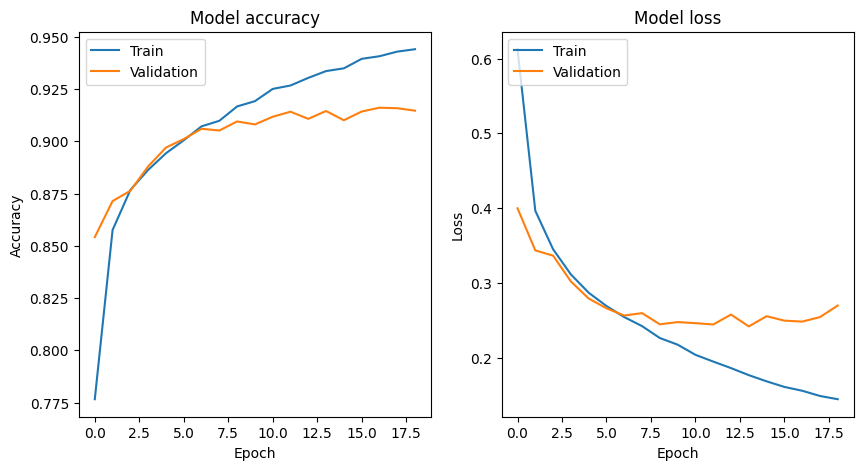

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [35]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [32]:
y_pred = cnn.predict(X_test)
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

313/313 [==============================] - 1s 4ms/step


[9, 2, 1, 1, 6]

In [33]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

Testing

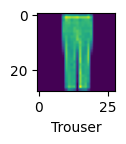

In [42]:
plot_sample(X_test,y_test,97)

In [43]:
classes[y_classes[97]]

'Trouser'

In [45]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.87      0.87      1000
           3       0.93      0.90      0.91      1000
           4       0.84      0.89      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.77      0.68      0.73      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**PROJECT REPORT**

**Project Title**: Apparel Image Classification

**Objective**: The project aimed to identify different pieces of apparel spread over 10 classes.

**Methods**: We utilized a Convolution Neural Network ARchitecture  to achieve our objectives.

**Key Findings**: Our project resulted in a accuracy of 91.02% for generating the correct label according to the label.

**Work Division**: Aditi Choudhury : Data Collection, Data Preprocessing and azure.
Aarushi Ray : Model Building, Testing and Validation,
 Inference, Project Summarization.

In summary, we have successfully applied Convolutional Neural Networks (CNNs) to perform image classification on the Fashion MNIST dataset.
This project showcases the power and versatility of CNNs in image classification tasks. It demonstrates their potential to revolutionize the way we categorize and analyze visual data, with applications extending far beyond fashion recognition. As technology continues to advance, CNNs remain a pivotal tool for solving complex image-based challenges in the modern era.







